In [1]:
from os import listdir
from pickle import dump
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.applications.resnet50 import ResNet50

# Load libraries
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import os
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt

In [2]:
# Load data
images_dir = os.listdir("./data/Images")

images_path = './data/Images/'
captions_path = './data/Flickr8k_text/Flickr8k.token.txt'
train_path = './data/Flickr8k_text/Flickr_8k.trainImages.txt'
val_path = './data/Flickr8k_text/Flickr_8k.devImages.txt'
test_path = './data/Flickr8k_text/Flickr_8k.testImages.txt'

captions = open(captions_path, 'r').read().split("\n")
x_train = open(train_path, 'r').read().split("\n")
x_val = open(val_path, 'r').read().split("\n")
x_test = open(test_path, 'r').read().split("\n")

In [3]:
# Loading captions as values and images as key in dictionary
tokens = {}

for ix in range(len(captions)-1):
    temp = captions[ix].split("#")
    print(temp)
    if temp[0] in tokens:
        tokens[temp[0]].append(temp[1][2:])
    else:
        tokens[temp[0]] = [temp[1][2:]]

['1000268201_693b08cb0e.jpg', '0\tA child in a pink dress is climbing up a set of stairs in an entry way .']
['1000268201_693b08cb0e.jpg', '1\tA girl going into a wooden building .']
['1000268201_693b08cb0e.jpg', '2\tA little girl climbing into a wooden playhouse .']
['1000268201_693b08cb0e.jpg', '3\tA little girl climbing the stairs to her playhouse .']
['1000268201_693b08cb0e.jpg', '4\tA little girl in a pink dress going into a wooden cabin .']
['1001773457_577c3a7d70.jpg', '0\tA black dog and a spotted dog are fighting']
['1001773457_577c3a7d70.jpg', '1\tA black dog and a tri-colored dog playing with each other on the road .']
['1001773457_577c3a7d70.jpg', '2\tA black dog and a white dog with brown spots are staring at each other in the street .']
['1001773457_577c3a7d70.jpg', '3\tTwo dogs of different breeds looking at each other on the road .']
['1001773457_577c3a7d70.jpg', '4\tTwo dogs on pavement moving toward each other .']
['1002674143_1b742ab4b8.jpg', '0\tA little girl covere

['1401961581_76921a75c5.jpg', '4\tThe small girl is sitting in a harness , strapped to a tether , while others watch .']
['1402640441_81978e32a9.jpg', '0\tA boy in red and blue shorts is trying to catch a soccer ball while running in sand .']
['1402640441_81978e32a9.jpg', '1\tA young boy wearing a red bathing suit reaches for a soccer ball .']
['1402640441_81978e32a9.jpg', '2\tKid guards face from soccer ball']
['1402640441_81978e32a9.jpg', '3\tThe little boy in red trunks is attempting to catch a soccer ball that is coming towards him .']
['1402640441_81978e32a9.jpg', '4\tYoung boy plays ball on the beach .']
['1402641725_5e027ecaa7.jpg', '0\tFour children are playing on a hill of sand .']
['1402641725_5e027ecaa7.jpg', '1\tFour children playing in the sand at a beach .']
['1402641725_5e027ecaa7.jpg', '2\tFour children playing on a sand dune .']
['1402641725_5e027ecaa7.jpg', '3\tFour kids are sliding down a mountain of sand .']
['1402641725_5e027ecaa7.jpg', '4\tFour kids rolling and sl

['1765164972_92dac06fa9.jpg', '4\tThe person is posing in a red flannel shirt with a Mohawk .']
['1770036088_08abe4f6e9.jpg', '0\tA man and a girl in bed .']
['1770036088_08abe4f6e9.jpg', '1\tA parent and child are in and embrace in bed .']
['1770036088_08abe4f6e9.jpg', '2\tA woman and a small child laying in bed .']
['1770036088_08abe4f6e9.jpg', '3\tThe woman is laying in bed with a young girl .']
['1770036088_08abe4f6e9.jpg', '4\tTwo people are in bed .']
['1771490732_0ab5f029ac.jpg', '0\tThree boys playing soccer in a field']
['1771490732_0ab5f029ac.jpg', '1\tThree boys playing soccer .']
['1771490732_0ab5f029ac.jpg', '2\tTwo boys in blue and yellow uniforms play soccer with a boy in a pink printed uniform .']
['1771490732_0ab5f029ac.jpg', '3\tTwo teammates attempt to convert a soccer goal past the goalie .']
['1771490732_0ab5f029ac.jpg', '4\tUniformed children playing soccer']
['1772859261_236c09b861.jpg', '0\tA black and white dog plays in the water .']
['1772859261_236c09b861.jpg

['2097403787_77a154f5b9.jpg', '3\tThe person is standing by the water in front of the snow topped mountains .']
['2097403787_77a154f5b9.jpg', '4\tThe traveller pauses in front of the mountain view .']
['2097407245_c798e0dcaf.jpg', '0\tA man in a winter jacket and knit cap stand with his arms up at his side in a snow landscape .']
['2097407245_c798e0dcaf.jpg', '1\tA man is standing on dirt with his hands in the air with mountains and snow behind him .']
['2097407245_c798e0dcaf.jpg', '2\tA man raises his arms on rocky beach .']
['2097407245_c798e0dcaf.jpg', '3\tOne lone man with fist in the air with large rocky mountains in the background']
['2097407245_c798e0dcaf.jpg', '4\tMan with outstretched arms standing on snow-covered rocks .']
['2097420505_439f63c863.jpg', '0\tA male hiker wearing a green jacket is posing next to a large glacier .']
['2097420505_439f63c863.jpg', '1\tA man with a camera and an ice structure behind him .']
['2097420505_439f63c863.jpg', '2\tA man with a camera crouc

['224273695_0b517bd0eb.jpg', '3\tThe brown mountains have snow on them and there are clouds in the sky .']
['224273695_0b517bd0eb.jpg', '4\tThe mountain climbers set up camp at the apex .']
['2242863004_3a9f82a31f.jpg', '0\tA dog attempting to chew on a red ball .']
['2242863004_3a9f82a31f.jpg', '1\tA dog with a red ball .']
['2242863004_3a9f82a31f.jpg', '2\tA German shepherd is playing with a red ball .']
['2242863004_3a9f82a31f.jpg', '3\tA German Shepherd is playing with a red ball .']
['2242863004_3a9f82a31f.jpg', '4\ta German Sheppard dog bting a large red ball']
['224369028_b1ac40d1fa.jpg', '0\tA little blonde girl is standing in front of a water fountain .']
['224369028_b1ac40d1fa.jpg', '1\ta young blond girl standing in front of a large fenced in fountain']
['224369028_b1ac40d1fa.jpg', '2\tA young girl standing in front of a fountain']
['224369028_b1ac40d1fa.jpg', '3\tA young in a white dress standing in front of a fence and fountain .']
['224369028_b1ac40d1fa.jpg', '4\tThe litt

['2389107995_ec756f3514.jpg', '2\tBlack dog swimming in water .']
['2389107995_ec756f3514.jpg', '3\tThe black dog gets soaked as it plays in the water .']
['2389107995_ec756f3514.jpg', '4\tThe dog is swimming in the water .']
['2390369143_6523253a73.jpg', '0\tThe greyhound racing dogs are running around a bend in the track .']
['2390369143_6523253a73.jpg', '1\tThere are three dogs racing around a muddy track .']
['2390369143_6523253a73.jpg', '2\tThree dogs are making a turn in a dog race .']
['2390369143_6523253a73.jpg', '3\tThree greyhound dogs wearing muzzles round the corner of a racetrack .']
['2390369143_6523253a73.jpg', '4\tThree greyhounds racing around the corner of a track .']
['2390778197_4d9d03d4b9.jpg', '0\tA blonde woman playing horseshoes in the snow .']
['2390778197_4d9d03d4b9.jpg', '1\tA woman in a jacket is standing next to a fence playing horse shoes .']
['2390778197_4d9d03d4b9.jpg', '2\tA woman outside throws a horseshoe .']
['2390778197_4d9d03d4b9.jpg', '3\tA Yong l

['2483792149_a9b4ffecec.jpg', '0\tA blonde woman is standing in the middle of a field of tall pink flowers .']
['2483792149_a9b4ffecec.jpg', '1\tA blonde woman walks through shoulder-high pink tulips , in front of a green field with a small house and trees in the distance .']
['2483792149_a9b4ffecec.jpg', '2\tA woman sitting in a field of flowers']
['2483792149_a9b4ffecec.jpg', '3\tA woman standing among a bunch of pink flowers , with a little shack in the back .']
['2483792149_a9b4ffecec.jpg', '4\tThe blonde woman is crouching in a field of pink tulips , near a grassy field and trees .']
['2483993772_f64e9e4724.jpg', '0\tA black and brown dog trying to catch a blue ball .']
['2483993772_f64e9e4724.jpg', '1\tA dog chasing a ball .']
['2483993772_f64e9e4724.jpg', '2\tA dog jumps for the blue tennis ball .']
['2483993772_f64e9e4724.jpg', '3\tLarge brown dog jumps for blue ball']
['2483993772_f64e9e4724.jpg', '4\tThe German shepherd dog is trying to catch a blue ball .']
['2483993827_2438

['260162669_c79a900afb.jpg', '1\tA gray dog is in grass .']
['260162669_c79a900afb.jpg', '2\tA gray fuzzy haired dog has its nose in the low cut grass it is standing in .']
['260162669_c79a900afb.jpg', '3\tA small , fluffy , grey dog is in the green grass .']
['260162669_c79a900afb.jpg', '4\tThe black and white animal is in the grass .']
['2602083686_e8a1af69cf.jpg', '0\tTwo ladies are wearing nothing except body paint and riding on bicycles in a street fair .']
['2602083686_e8a1af69cf.jpg', '1\tTwo nude women painted black and white are riding bicycles on the road .']
['2602083686_e8a1af69cf.jpg', '2\tTwo painted women ride bicycles on the street with onlookers nearby .']
['2602083686_e8a1af69cf.jpg', '3\tTwo woman wearing body paint ride bikes through a crowd .']
['2602083686_e8a1af69cf.jpg', '4\tTwo women in costume ride bikes .']
['2602085456_d1beebcb29.jpg', '0\tA naked woman covered in mud in front of a crowd']
['2602085456_d1beebcb29.jpg', '1\tA naked woman covered in paint']
['

['271637337_0700f307cf.jpg', '0\tA collie jumps over a hurdle .']
['271637337_0700f307cf.jpg', '1\tA dog in a competition jumps over a hurdle .']
['271637337_0700f307cf.jpg', '2\tA dog jumping over a hurdle .']
['271637337_0700f307cf.jpg', '3\tA dog jumps over a barrier .']
['271637337_0700f307cf.jpg', '4\tA furry dog is jumping over a hurdle .']
['2716457668_187a6d2b1c.jpg', '0\tA boy wearing sunglasses looks straight ahead .']
['2716457668_187a6d2b1c.jpg', '1\tA boy with a Mohawk and sunglasses .']
['2716457668_187a6d2b1c.jpg', '2\tA child with a Mohawk is wearing dark sunglasses .']
['2716457668_187a6d2b1c.jpg', '3\tA young boy wearing glasses has his hair set to stand up .']
['2716457668_187a6d2b1c.jpg', '4\tThe head of a child with dark glasses is in focus .']
['271660510_dd4ba34b35.jpg', '0\tA man and a woman in white shirts and dark glasses smiling .']
['271660510_dd4ba34b35.jpg', '1\tA man and woman wearing sunglasses and white t-shirts smile for the camera .']
['271660510_dd4b

['2844963839_ff09cdb81f.jpg', '0\ta group of football players huddled together in the middle of the field .']
['2844963839_ff09cdb81f.jpg', '1\tA group of football players wearing orange and blue uniforms gather together on the field .']
['2844963839_ff09cdb81f.jpg', '2\tFootball players in blue and orange uniforms are huddled together and hugging each other .']
['2844963839_ff09cdb81f.jpg', '3\tFootball players in uniform embrace one another .']
['2844963839_ff09cdb81f.jpg', '4\tThe men in the Gators helmets have their arms wrapped around each other .']
['2845246160_d0d1bbd6f0.jpg', '0\tA man in a hat and red shirt aims a cellphone at a person walking toward him on the sidewalk .']
['2845246160_d0d1bbd6f0.jpg', '1\tA man in a red sweatshirt and a hat is looking at his phone while another man in black walks closer to him down the sidewalk .']
['2845246160_d0d1bbd6f0.jpg', '2\tA man in a red sweatshirt and a straw hat uses a cellphone .']
['2845246160_d0d1bbd6f0.jpg', '3\tA man in a str

['2922981282_203f04bf9b.jpg', '0\tA young couple lying in bed .']
['2922981282_203f04bf9b.jpg', '1\ta young couple lying on a bed together']
['2922981282_203f04bf9b.jpg', '2\tA young man and woman lay on a bed , the woman makes a goofy face .']
['2922981282_203f04bf9b.jpg', '3\tInterracial couple in bed making faces']
['2922981282_203f04bf9b.jpg', '4\tTwo young people are lying on a bed together .']
['2923475135_a6b6e13d26.jpg', '0\tA brown horse with a rider sitting on him is jumping over a blue barrier']
['2923475135_a6b6e13d26.jpg', '1\tA horse and rider , jumping a barrier on a course .']
['2923475135_a6b6e13d26.jpg', '2\tA person in white jumps a brown horse over the gate .']
['2923475135_a6b6e13d26.jpg', '3\tJockey and horse jump over blue hurdle']
['2923475135_a6b6e13d26.jpg', '4\tThere is a horse and rider jumping over a hurdle .']
['2923497185_c64004ff2d.jpg', '0\ta brown and white dog is running through a white marker in a grassy field .']
['2923497185_c64004ff2d.jpg', '1\tA 

['3041170372_c4376cd497.jpg', '4\tMan riding a mountain bike doing a jump in the air .']
['3041348852_872c027c16.jpg', '0\tFive small white dogs are wearing muzzles and running .']
['3041348852_872c027c16.jpg', '1\tFive white and white and brown , muzzled dogs run across a green , grassy lawn .']
['3041348852_872c027c16.jpg', '2\tFive white dogs with muzzles are running towards the camera .']
['3041348852_872c027c16.jpg', '3\tLittle muzzled white dogs are running in the grass .']
['3041348852_872c027c16.jpg', '4\tSeveral dogs in muzzles are racing on the grass .']
['3041384194_04316bd416.jpg', '0\tA girl with a short haircut and eyebrow piercing bites her finger and crosses her arms .']
['3041384194_04316bd416.jpg', '1\tA very pale redheaded teen has her hand to her face thinking .']
['3041384194_04316bd416.jpg', '2\tA woman wearing a blue face is resting her finger beside her nose .']
['3041384194_04316bd416.jpg', '3\tA woman with red hair holds her hand to her mouth and looks pensive

['3122888809_9ae9b4b9b2.jpg', '0\tA black dog and a brown dog are smelling each others noses .']
['3122888809_9ae9b4b9b2.jpg', '1\tA black dog and a brown dog touching noses in a grassy field .']
['3122888809_9ae9b4b9b2.jpg', '2\tA black dog is touching noses with a light brown dog .']
['3122888809_9ae9b4b9b2.jpg', '3\tThere are two dogs , one is black and the other is brown , sniffing each other .']
['3122888809_9ae9b4b9b2.jpg', '4\tTwo dogs examine each other in a field .']
['3122938209_2b2c6c1fab.jpg', '0\tA bicyclist does tricks on a lime green bike .']
['3122938209_2b2c6c1fab.jpg', '1\tA man dressed in black rides a green bike .']
['3122938209_2b2c6c1fab.jpg', '2\tA man performs a stoppie trick on his BMX green bicycle with no hands .']
['3122938209_2b2c6c1fab.jpg', '3\tMan on green bicycle performing a trick on one wheel .']
['3122938209_2b2c6c1fab.jpg', '4\tThe man is doing a trick on his green bike .']
['3123351642_3794f2f601.jpg', '0\tA snowboarder in bright green performing a

['3207775692_bb897d9afd.jpg', '3\tThe black dog is biting the ear of the yellow dog .']
['3207775692_bb897d9afd.jpg', '4\tThe black dog playfully bites the yellow dog near the furniture .']
['3208032657_27b9d6c4f3.jpg', '0\tA man power washes some steps beside a swimming pool .']
['3208032657_27b9d6c4f3.jpg', '1\tA man power washes steps by a large swimming pool .']
['3208032657_27b9d6c4f3.jpg', '2\tA person cleaning some steps by a pool .']
['3208032657_27b9d6c4f3.jpg', '3\tA person powerwashing stairs leading down to a pool .']
['3208032657_27b9d6c4f3.jpg', '4\tMan holding equipment near steps poolside with a white building in background .']
['3208074567_ac44aeb3f3.jpg', '0\tA boy wearing a red shirt is splashed by water .']
['3208074567_ac44aeb3f3.jpg', '1\tA child with water splashing on him .']
['3208074567_ac44aeb3f3.jpg', '2\tA little boy being splashed by water on his head']
['3208074567_ac44aeb3f3.jpg', '3\tlittle kid in red pooh shirt getting wet']
['3208074567_ac44aeb3f3.jpg

['3284460070_6805990149.jpg', '4\tThe mountain bike is being ridden on a trail through the wood that is marked out by red tape .']
['3284887033_e2e48f1863.jpg', '0\tA sandy brown dog is playing with a soccer ball outside .']
['3284887033_e2e48f1863.jpg', '1\tA tan dog chases a black and white soccer ball .']
['3284887033_e2e48f1863.jpg', '2\tA tan dog is playing with a soccer ball .']
['3284887033_e2e48f1863.jpg', '3\tA yellow dog plays with a soccer ball .']
['3284887033_e2e48f1863.jpg', '4\tThe yellow dog is playing with a soccer ball .']
['3284899112_f11ab3cfe6.jpg', '0\tA man and a woman are standing in front of a building']
['3284899112_f11ab3cfe6.jpg', '1\tA man and woman stand in front of a white building and look at their hands .']
['3284899112_f11ab3cfe6.jpg', '2\tA older couple next to the box office .']
['3284899112_f11ab3cfe6.jpg', '3\tEldery couple wearing hats looking at tickets on the street .']
['3284899112_f11ab3cfe6.jpg', '4\tOld man and woman in jackets facing each o

['3348384389_73b6647017.jpg', '2\tThe dog with the red collar is bearing its teeth at the dog with the blue collar .']
['3348384389_73b6647017.jpg', '3\tTwo dogs are on a white carpet with one of the dogs showing its fangs .']
['3348384389_73b6647017.jpg', '4\tTwo dogs , one with mouth open .']
['3348385580_10b53391f9.jpg', '0\tA helmeted boy flies through the air on a snowboard .']
['3348385580_10b53391f9.jpg', '1\tA snowboarder balancing on a wall']
['3348385580_10b53391f9.jpg', '2\tA snowboarder in green grinds along the edge of a rail at night .']
['3348385580_10b53391f9.jpg', '3\ta snowboarder wearing a green jacket jumping a green rainling']
['3348385580_10b53391f9.jpg', '4\tA snowboarder wearing a green jacket jumps above a low gate .']
['3348785391_c243faf6bb.jpg', '0\tA man in a swimsuit walks on a tightrope .']
['3348785391_c243faf6bb.jpg', '1\tMan falling off a tightrope']
['3348785391_c243faf6bb.jpg', '2\tThe men are walking barefoot on a tightrope .']
['3348785391_c243faf6

['3429142249_d09a32e291.jpg', '2\tA man repels down a snowy mountain .']
['3429142249_d09a32e291.jpg', '3\tA rock climber scales an icy wall .']
['3429142249_d09a32e291.jpg', '4\tThe climber is wearing a red jacket as he climbs the ice .']
['3429194423_98e911a101.jpg', '0\tA man doing a trick on skis .']
['3429194423_98e911a101.jpg', '1\tA man makes an X with his skis as he jumps .']
['3429194423_98e911a101.jpg', '2\tA skier in a plaid jacket flies through the air against a dark blue sky .']
['3429194423_98e911a101.jpg', "3\tPerson in dark pants and print top on ski 's in the air over snow covered ground ."]
['3429194423_98e911a101.jpg', '4\tThe person is jumping through the air on skis .']
['3429351222_17ae744daf.jpg', '0\tA man and a woman walk at a flea market .']
['3429351222_17ae744daf.jpg', '1\tAn asian couple walks through a market .']
['3429351222_17ae744daf.jpg', '2\tA young couple walking together through an outdoor market .']
['3429351222_17ae744daf.jpg', '3\tA young man and

['3501313414_ae865b6fdf.jpg', '3\tA small tan dog jumps over the barbed wire fence .']
['3501313414_ae865b6fdf.jpg', '4\tThe brown and white dog is jumping over a high wire fence .']
['3501386648_e11e3f3152.jpg', '0\tA forest guide points something up to a group of visitors .']
['3501386648_e11e3f3152.jpg', '1\tA group of about 11 people of all ages with binoculars in the woods']
['3501386648_e11e3f3152.jpg', '2\tA group of people are being lead on an outdoor tour with an older tour guide .']
['3501386648_e11e3f3152.jpg', '3\tA group of people pointing and looking at something off-camera .']
['3501386648_e11e3f3152.jpg', '4\tA group of people with cameras and binoculars point and look at something .']
['350176185_b8c5591e36.jpg', '0\tA dog is jumping down the stairs .']
['350176185_b8c5591e36.jpg', '1\tA dog jumps down a flight of stairs .']
['350176185_b8c5591e36.jpg', '2\tA German Shepherd jumps off of a set of stairs .']
['350176185_b8c5591e36.jpg', '3\tA woman watches a dog jump do

['3563871276_c8b2a00df5.jpg', '1\tA windboarder stands on their windboard in the ocean .']
['3563871276_c8b2a00df5.jpg', '2\tThat person is in the water with a World festival sign .']
['3563871276_c8b2a00df5.jpg', '3\tThere is a person on a sailboard with an orange and yellow sail out on the water .']
['3563871276_c8b2a00df5.jpg', '4\tThis person , whose board displays an orange and yellow sail , is sailing through the water .']
['3563924606_5914392cd8.jpg', '0\tTwo brown and white puppies are playing tug of war with a blue strip of fabric .']
['3563924606_5914392cd8.jpg', '1\tTwo dogs fight over a piece of cloth .']
['3563924606_5914392cd8.jpg', '2\tTwo dogs tug at a blue leash .']
['3563924606_5914392cd8.jpg', '3\tTwo puppies are tugging on a rag in the grass .']
['3563924606_5914392cd8.jpg', '4\tTwo puppies pulling on a string .']
['3564007203_df2b8010f1.jpg', '0\tA man is talking to a mounted policeman outside a stadium .']
['3564007203_df2b8010f1.jpg', '1\tA man talks to a mounted

['3639684919_cb6fbf5638.jpg', '3\tA wedding photo of a bride with purple flowers and her groom .']
['3639684919_cb6fbf5638.jpg', '4\tA young couple in wedding outfits poses for a picture .']
['3639704469_fe83e1c9b7.jpg', '0\tA couple in wedding outfits watch the sea from behind a wooden railing .']
['3639704469_fe83e1c9b7.jpg', '1\tA man and a woman in wedding clothes look out toward the water .']
['3639704469_fe83e1c9b7.jpg', '2\tA woman in a long white bridal gown and a man in a black suit are standing at a rail looking at the ocean .']
['3639704469_fe83e1c9b7.jpg', '3\tA woman in a white wedding gown with gold trim standing with a man in a black suit .']
['3639704469_fe83e1c9b7.jpg', '4\tThe groom stands at a railing by the sea with his arm around the bride .']
['3639845565_be547c38ba.jpg', '0\tA man in a cowboy hat sits on bleachers near the water and plays guitar .']
['3639845565_be547c38ba.jpg', '1\tA man plays a guitar while sitting on bleachers in front of a lake .']
['36398455

['3715469645_6d1dc019b3.jpg', '0\tTwo females are standing next to each other and appear to be unexcited .']
['3715469645_6d1dc019b3.jpg', '1\tTwo girls are standing by a wooden wall looking off to their left .']
['3715469645_6d1dc019b3.jpg', '2\tTwo women with black hair stand in front of plywood .']
['3715469645_6d1dc019b3.jpg', '3\tTwo young women are leaning up against a wooden wall .']
['3715469645_6d1dc019b3.jpg', '4\tTwo young women , one with folded arms , look off screen .']
['3715559023_70c41b31c7.jpg', '0\tA girl is sitting on a rock next to a waterfall .']
['3715559023_70c41b31c7.jpg', '1\tAn onlooker sits on the shore of a pool overlooked by massive waterfalls .']
['3715559023_70c41b31c7.jpg', '2\tA person sits on a rock at the edge of a large waterfall .']
['3715559023_70c41b31c7.jpg', '3\tA person sitting on a rock by a fall .']
['3715559023_70c41b31c7.jpg', '4\tA woman is sitting on a rock next to a large waterfall .']
['3716244806_97d5a1fb61.jpg', '0\tA family sitting 

['446286714_dcec7f339e.jpg', '1\tAn older man wearing a brown coat siting on a bench .']
['446286714_dcec7f339e.jpg', '2\tAn old man in a coat and hat sitting on a park bench .']
['446286714_dcec7f339e.jpg', '3\tOld man in tan jacket and black cap sitting on bench']
['446286714_dcec7f339e.jpg', '4\tThe older man with the shopping bag and cane is sitting on a bench .']
['446291803_2fd4641b99.jpg', '0\tThese woman are watching people play tennis from a bench .']
['446291803_2fd4641b99.jpg', '1\tTwo individuals watch a tennis match .']
['446291803_2fd4641b99.jpg', '2\tTwo people sit on a park bench while watching a neighborhood tennis match .']
['446291803_2fd4641b99.jpg', '3\tTwo people with red scarves on their heads are watching tennis .']
['446291803_2fd4641b99.jpg', '4\tTwo women sitting on a bench in front of a tennis court near a building complex .']
['446514680_ff5ca15ece.jpg', '0\tTwo brown dogs are fighting and they are both wearing red .']
['446514680_ff5ca15ece.jpg', '1\tTwo b

['534875358_6ea30d3091.jpg', '4\tIt looks like the girl went shopping and got something from the AVEDA store .']
['534886684_a6c9f40fa1.jpg', '0\tA man is walking a dog on a leash down the street']
['534886684_a6c9f40fa1.jpg', '1\tA man walking his dog in a crosswalk .']
['534886684_a6c9f40fa1.jpg', '2\ta man walks his dog in the street .']
['534886684_a6c9f40fa1.jpg', '3\tThe man in the denim outfit walks a black and tan dog on a crosswalk .']
['534886684_a6c9f40fa1.jpg', '4\tYoung man walking dog']
['535123126_c06c1ab9bf.jpg', '0\tA brown dog with a pink collar with a heart on it playing with a bigger dog .']
['535123126_c06c1ab9bf.jpg', '1\tBig dog trying to bite little dog']
['535123126_c06c1ab9bf.jpg', '2\tBoth the larger dog and the smaller dog have their mouths open .']
['535123126_c06c1ab9bf.jpg', '3\tTwo brown dogs fighting each other .']
['535123126_c06c1ab9bf.jpg', '4\tTwo dogs , both wearing collars , are playing with one another in the grass .']
['535249787_0fcaa613a0.jpg'

['872622575_ba1d3632cc.jpg', '3\tA shirtless man climbs up a steep mountain .']
['872622575_ba1d3632cc.jpg', '4\tA young white man is climbing a mountain with a rope as a guide .']
['873633312_a756d8b381.jpg', '0\tA boy in a life jacket jumps onto something yellow , out of frame .']
['873633312_a756d8b381.jpg', '1\tA boy wearing a life vest suspended in the air .']
['873633312_a756d8b381.jpg', '2\tA child wearing a white , red , and black life jacket was bounced into the air by something big and yellow .']
['873633312_a756d8b381.jpg', '3\tA child with a floatation vest is being bounced off of something .']
['873633312_a756d8b381.jpg', '4\tThe kid in the life vest jumps up in the air .']
['874665322_9ad05c4065.jpg', '0\tA brown dog is playing outside in a grassy area .']
['874665322_9ad05c4065.jpg', '1\tA brown dog wearing a blue harness jumps over the grassy field .']
['874665322_9ad05c4065.jpg', '2\tA brown dog with a blue bandanna is jumping over grass .']
['874665322_9ad05c4065.jpg'

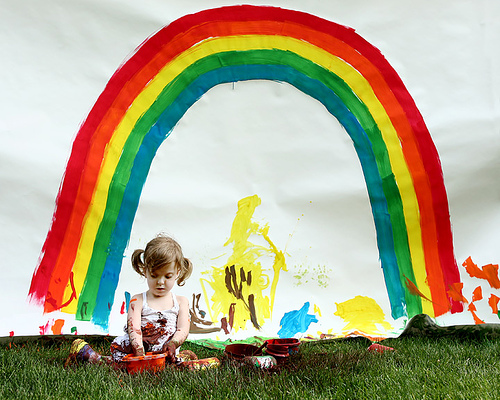

A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .
A little girl is sitting in front of a large painted rainbow .
A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .
There is a girl with pigtails sitting in front of a rainbow painting .
Young girl with pigtails painting outside in the grass .


In [4]:
# displaying an image and captions given to it
temp = captions[10].split("#")
from IPython.display import Image, display
z = Image(filename=images_path+temp[0])
display(z)

for ix in range(len(tokens[temp[0]])):
    print(tokens[temp[0]][ix])

## Image Encoder: ResNet

In [5]:
# Extract features from each photo in the directory
def extract_features(directory):
    # load the model
    model = ResNet50()
    # Delete the last layer (Not interested in image classification)
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # summarize
    print(model.summary())
    # extract features from each photo
    features = dict()
    # Returns a list containing the names of the entries in the directory given by path
    for name in listdir(directory): 
        # load an image from file
        filename = directory + '/' + name
        # Loads an image into PIL format.
        image = load_img(filename, target_size=(224, 224))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # reshape data for the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        # prepare the image for the RESNET model
        image = preprocess_input(image)
        # get features
        feature = model.predict(image, verbose=0)
        # get image id
        image_id = name.split('.')[0]
        # store feature
        features[image_id] = feature
        print('>%s' % name)
    return features

# extract features from all images
features = extract_features(images_path)
print('Extracted Features: %d' % len(features))
# save to file
dump(features, open('features2.pkl', 'wb'))

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

>2387197355_237f6f41ee.jpg
>2609847254_0ec40c1cce.jpg
>2046222127_a6f300e202.jpg
>2853743795_e90ebc669d.jpg
>2696951725_e0ae54f6da.jpg
>3421131122_2e4bde661e.jpg
>3229730008_63f8ca2de2.jpg
>3220009216_10f088185e.jpg
>3415578043_03d33e6efd.jpg
>3437273677_47d4462974.jpg
>3543600125_223747ef4c.jpg
>2594459477_8ca0121a9a.jpg
>2579899436_5086a33c7a.jpg
>3387630781_f421a94d9d.jpg
>3591094476_b61acd63d6.jpg
>3155501473_510f9c9f6b.jpg
>2521062020_f8b983e4b2.jpg
>3564007203_df2b8010f1.jpg
>2869491449_1041485a6b.jpg
>2443229844_277cded27d.jpg
>772212710_f5fc22ed35.jpg
>2269021076_cefc9af989.jpg
>451597318_4f370b1339.jpg
>96978713_775d66a18d.jpg
>2924259848_effb4dcb82.jpg
>1057251835_6ded4ada9c.jpg
>1463732130_a754441289.jpg
>1763020597_d4cc8f0f8a.jpg
>3072611047_109bf8b7c3.jpg
>1002674143_1b742ab4b8.jpg
>3048380686_732db55281.jpg
>1026685415_0431cbf574.jpg
>2480832276_fa55480ecb.jpg
>2300168895_a9b83e16fc.jpg
>3459871361_92d1ecda36.jpg
>3046286572_d2050ab0d9.jpg
>408573233_1fff966798.jpg
>30308

>2584412512_6767593f24.jpg
>271660510_dd4ba34b35.jpg
>2285152690_3fb93f65f1.jpg
>2914331767_8574e7703d.jpg
>536495604_b22bbc905a.jpg
>241345721_3f3724a7fc.jpg
>3215108916_0473007b47.jpg
>479807465_cf42f39d00.jpg
>470373679_98dceb19e7.jpg
>2445654384_4ee3e486e1.jpg
>3099091086_f75f0ce09d.jpg
>3263395801_5e4cee2b9e.jpg
>3259231890_16fe167b31.jpg
>2636876892_9353521a1c.jpg
>823675317_b5fbdb17b3.jpg
>523249012_a0a25f487e.jpg
>311267421_e204e643cf.jpg
>416960865_048fd3f294.jpg
>3721881082_afe9fc734e.jpg
>2548777800_d7b9cf1c2b.jpg
>2789937754_5d1fa62e95.jpg
>2088460083_42ee8a595a.jpg
>1224851143_33bcdd299c.jpg
>181157221_e12410ef0b.jpg
>791338571_7f38510bf7.jpg
>3368207495_1e2dbd6d3f.jpg
>485566887_57eac33bd1.jpg
>2788945468_74a9618cfa.jpg
>409327234_7b29eecb4e.jpg
>3298233193_d2a550840d.jpg
>3637013_c675de7705.jpg
>241109594_3cb90fe2a3.jpg
>2588927489_f4da2f11ec.jpg
>3184891327_8785194e3c.jpg
>309238565_2d5d8dc8bf.jpg
>3426789838_8771f0ed56.jpg
>468930779_8008d90e10.jpg
>2774430374_fee1d793

>518251319_40e031e818.jpg
>2080033499_6be742f483.jpg
>241347114_6273736da8.jpg
>987907964_5a06a63609.jpg
>2355763034_9fb61a8165.jpg
>219843860_332e5ca7d4.jpg
>3270047169_2ed289a9af.jpg
>2251418114_2b0cd4c139.jpg
>3474999131_788cbf253f.jpg
>3406930103_4db7b4dde0.jpg
>69189650_6687da7280.jpg
>3712742641_641282803e.jpg
>2417745327_a2c2705043.jpg
>2713554148_64cd465e71.jpg
>2244613488_4d1f9edb33.jpg
>3669069522_555c97fbfb.jpg
>2613209320_edf6a2b7e9.jpg
>2902269566_419d9f1d8e.jpg
>765298136_7805fbb079.jpg
>241345942_ea76966542.jpg
>241345522_c3c266a02a.jpg
>3169591322_d0b6d0cd04.jpg
>1308617539_54e1a3dfbe.jpg
>421322723_3470543368.jpg
>483136916_16976f4902.jpg
>3050264832_4215f2b398.jpg
>3231575742_31732664cf.jpg
>3178371973_60c6b8f110.jpg
>368393384_86defdcde8.jpg
>498957941_f0eda42787.jpg
>368212336_bc19b0bb72.jpg
>3173014908_b3e69594b6.jpg
>3450874870_c4dcf58fb3.jpg
>3189964753_a95536ced9.jpg
>3246773992_89bf86937b.jpg
>47871819_db55ac4699.jpg
>3080891382_edf83dde18.jpg
>3225880532_c8d5d

>2797511323_bf20acab45.jpg
>3018847610_0bf4d7e43d.jpg
>3202360797_2084743e90.jpg
>985067019_705fe4a4cc.jpg
>2291485126_b8d41a63f4.jpg
>2308271254_27fb466eb4.jpg
>2140747429_62cfd89ae9.jpg
>3465000218_c94e54e208.jpg
>3322200641_c2e51ff37b.jpg
>3563668905_689ed479c5.jpg
>3424927725_c4d1fcfac3.jpg
>134894450_dadea45d65.jpg
>3568605391_54ec367d88.jpg
>3027009366_c8362521e8.jpg
>2220612655_030413b787.jpg
>300577374_bfccb0430b.jpg
>186346360_541047336f.jpg
>261490838_2f3ac98b12.jpg
>3540155303_08225a4567.jpg
>2921198890_6f70dfbf4c.jpg
>2992614450_b5a6692239.jpg
>2369452202_8b0e8e25ca.jpg
>2173677067_9d0732bcc2.jpg
>3181322965_ce9da15271.jpg
>3207343907_995f7ac1d2.jpg
>3381161854_af8b05243c.jpg
>2815256108_fc1302117d.jpg
>2940594396_20c40947b0.jpg
>519167484_ee03e2a91e.jpg
>281419391_522557ce27.jpg
>2250555512_71670078f5.jpg
>396179143_e1511336e1.jpg
>2437266971_b91a8f9a00.jpg
>2618322793_5fb164d86a.jpg
>3644142276_caed26029e.jpg
>2730938963_c4ed3e2258.jpg
>756521713_5d3da56a54.jpg
>839295615

>96420612_feb18fc6c6.jpg
>3484906808_ee20714408.jpg
>274313927_404d0e94ab.jpg
>2394922193_310166d6af.jpg
>2886411666_72d8b12ce4.jpg
>2980118787_2099de53ec.jpg
>2923475135_a6b6e13d26.jpg
>3274375509_4fe91a94c0.jpg
>2052702658_da1204f6d1.jpg
>2928152792_b16c73434a.jpg
>1107471216_4336c9b328.jpg
>3468275336_61936db92d.jpg
>108899015_bf36131a57.jpg
>2053006423_6adf69ca67.jpg
>2559921948_06af25d566.jpg
>3526150930_580908dab6.jpg
>3512033659_7e8a0c2ffa.jpg
>1679565118_d36f0d6d52.jpg
>2886837407_a4510ab1ef.jpg
>530454257_66d58b49ee.jpg
>2128119486_4407061c40.jpg
>3441511444_b031585b45.jpg
>2873070704_2141a7a86a.jpg
>3538527033_df13112d51.jpg
>2426781076_e3f4d2685c.jpg
>3640109324_3ce89e4d1a.jpg
>2862004252_53894bb28b.jpg
>3019857541_3de3e24f54.jpg
>530888330_a18343e38d.jpg
>544257613_d9a1fea3f7.jpg
>3577309234_c952c2af86.jpg
>241346146_f27759296d.jpg
>3484576025_a8c50942aa.jpg
>1956944011_c5661d3f22.jpg
>2553550034_5901aa9d6c.jpg
>218342358_1755a9cce1.jpg
>2990563425_2f7246f458.jpg
>380590140

>3162095736_cc41dd41ff.jpg
>3636491114_ab34dac833.jpg
>3537520829_aab733e16c.jpg
>496110746_a93ca191ae.jpg
>142802798_962a4ec5ce.jpg
>3105691757_817083b0a6.jpg
>1115565519_d976d4b1f1.jpg
>2192333873_2a0cbe849d.jpg
>3562001359_65c63aeda3.jpg
>2559638792_a803ff63d1.jpg
>3017203816_5dc2a6b392.jpg
>2619267133_53a5904ef4.jpg
>2978394277_4572967b97.jpg
>10815824_2997e03d76.jpg
>263216826_acf868049c.jpg
>2403544744_cba152f5c1.jpg
>3729405438_6e79077ab2.jpg
>2677656448_6b7e7702af.jpg
>2854291706_d4c31dbf56.jpg
>340667199_ecae5f6029.jpg
>373394550_1b2296b8c4.jpg
>640506101_ae1145b6d1.jpg
>3360730513_211e1a4db6.jpg
>2524003134_580e74328b.jpg
>3375070563_3c290a7991.jpg
>537479916_c033897fac.jpg
>2630507245_bea4804288.jpg
>3051125715_db76cebd1e.jpg
>412203580_2c7278909c.jpg
>3163281186_e2f43dfb5f.jpg
>299181827_8dc714101b.jpg
>3715559023_70c41b31c7.jpg
>368954110_821ccf005c.jpg
>3596459539_a47aa80612.jpg
>1316247213_1d2c726dd5.jpg
>3301754574_465af5bf6d.jpg
>2939475047_84585ea45c.jpg
>2319808437_b

>2978236380_fb24c43f1e.jpg
>3346040664_5b584e6133.jpg
>382701159_f98c1988cd.jpg
>1087168168_70280d024a.jpg
>2711720095_0b98426d3c.jpg
>3283913180_7d4e43602d.jpg
>3348385580_10b53391f9.jpg
>1016887272_03199f49c4.jpg
>3342487512_fd33971dea.jpg
>1163282319_b729b24c46.jpg
>3176131893_7181c733aa.jpg
>3199895624_4f01798c6f.jpg
>3251460982_4578a568bb.jpg
>2567035103_3511020c8f.jpg
>3500136982_bf7a85531e.jpg
>244399048_8332bb3270.jpg
>3453284877_8866189055.jpg
>236095034_c983bdfbbf.jpg
>3564543247_05cdbc31cf.jpg
>3671933270_d124e9a1a4.jpg
>3258394043_a0b6a94dce.jpg
>3265578645_4044a7049a.jpg
>3215896272_e9b4b547a9.jpg
>693785581_68bec8312a.jpg
>3529721084_4b405baf54.jpg
>497122685_a51b29dc46.jpg
>2419186511_f0ce5f9685.jpg
>2466171114_3fa51415a7.jpg
>2526585002_10987a63f3.jpg
>2773400732_5b65a25857.jpg
>2164363131_6930455d45.jpg
>2324979199_4193ef7537.jpg
>2831215155_07ba8f1805.jpg
>2543017787_9720b4fa1c.jpg
>3122579598_14841c038a.jpg
>2765747519_2b851e01d6.jpg
>1931690777_897a7d8ab6.jpg
>35615

>1786425974_c7c5ad6aa1.jpg
>3082934678_58534e9d2c.jpg
>339658315_fbb178c252.jpg
>299572828_4b38b80d16.jpg
>2213113526_beeb4f9bdc.jpg
>2854959952_3991a385ab.jpg
>3259666643_ae49524c81.jpg
>528498076_43f0ef36b5.jpg
>1341787777_4f1ebb1793.jpg
>3546891929_f31a99cd0d.jpg
>3335370208_460fc19bfa.jpg
>485245061_5a5de43e20.jpg
>3426724811_137855b4f7.jpg
>2161799386_27aa938421.jpg
>2822290399_97c809d43b.jpg
>3409506817_775e38d219.jpg
>405961988_fcfe97f31e.jpg
>2176874361_2b4149010b.jpg
>72964268_d532bb8ec7.jpg
>3156991513_3bf03333d8.jpg
>3156113206_53c2a7b5d8.jpg
>300222673_573fd4044b.jpg
>2657484970_610e18144f.jpg
>565605894_8f0bed0438.jpg
>2642474867_4e6346f809.jpg
>3509611207_7645b1d28d.jpg
>2087317114_cf06df5aa5.jpg
>3630102841_b4c3e00b2c.jpg
>3537400880_8f410d747d.jpg
>3697003897_d8ac13be9a.jpg
>872512911_ca383b40e4.jpg
>177302997_5b2d770a0a.jpg
>106514190_bae200f463.jpg
>3549614763_42f34f3d1e.jpg
>256439287_990ac4a761.jpg
>509123893_07b8ea82a9.jpg
>2393196444_8f4f540f5f.jpg
>101654506_8eb2

>694496803_f2a05869cf.jpg
>3541474181_489f19fae7.jpg
>3293018193_e4e0c8db7c.jpg
>2863349041_5eba6e3e21.jpg
>3269380710_9161b0bd00.jpg
>1803631090_05e07cc159.jpg
>3484841598_e26ee96aab.jpg
>3687995245_624b54090d.jpg
>145721496_687af9bb18.jpg
>2429978680_1e18a13835.jpg
>3613175012_bcd063e7c9.jpg
>476760133_c33d2bd83d.jpg
>3033668641_5905f73990.jpg
>3060594966_030658d318.jpg
>3189293145_35dea42679.jpg
>400562847_e15aba0aac.jpg
>3470008804_0ca36a7a09.jpg
>3364861247_d590fa170d.jpg
>3502993968_4ee36afb0e.jpg
>2923825744_ca125353f0.jpg
>2105756457_a100d8434e.jpg
>2420730259_86e7f8a815.jpg
>2409597310_958f5d8aff.jpg
>3582914905_f58db879ae.jpg
>3389321512_b11f499dab.jpg
>2295447147_458cfea65a.jpg
>2568417021_afa68423e5.jpg
>2186139563_e60c1d4b8b.jpg
>871290666_4877e128c0.jpg
>2073964624_52da3a0fc4.jpg
>1415591512_a84644750c.jpg
>2883324329_24361e2d49.jpg
>396763804_3b7f1e12a8.jpg
>443430496_3fea95a07d.jpg
>3718007650_e5930b4509.jpg
>2515247156_c1b759fc33.jpg
>2125216241_5b265a2fbc.jpg
>2355093

>3262301835_9f1a49b80a.jpg
>745880539_cd3f948837.jpg
>3282897060_8c584e2ce8.jpg
>2479180530_7ebba2d8bf.jpg
>3382303178_69b6d1bdd2.jpg
>3550763985_800cfee7e4.jpg
>2464259416_238ef13a2e.jpg
>2480850054_de3433b54a.jpg
>3099504809_565e17e49d.jpg
>3490597800_8f94f7d353.jpg
>3591462960_86045906bd.jpg
>2496236371_61dec88113.jpg
>3555729342_cc7a3b67fd.jpg
>3545652636_0746537307.jpg
>493507605_48fe8e3739.jpg
>3535372414_4c51c86fc4.jpg
>2380740486_8cd5d4601a.jpg
>2529116152_4331dabf50.jpg
>3626964430_cb5c7e5acc.jpg
>2554081584_233bdf289a.jpg
>3586239953_da4fb3f775.jpg
>3131107810_7e9b96cddc.jpg
>3217620013_8b17873273.jpg
>3214151585_f2d0b00b41.jpg
>3535284878_f90f10236e.jpg
>3425851292_de92a072ee.jpg
>3160531982_37f5636b8a.jpg
>524036004_6747cf909b.jpg
>3204712107_5a06a81002.jpg
>3404552106_f516df0f5b.jpg
>1536597926_c2e1bc2379.jpg
>3484832904_08619300d9.jpg
>2053733930_e245615ad4.jpg
>449352117_63c359c6e7.jpg
>2877159456_ea4a46b0d2.jpg
>525538142_7348f0bce7.jpg
>3712923460_1b20ebb131.jpg
>35333

>3355756569_b430a29c2a.jpg
>2470486377_c3a39ccb7b.jpg
>2647049174_0fb47cee2e.jpg
>2062607137_dac194ad02.jpg
>418796494_bdb441de42.jpg
>1552065993_b4dcd2eadf.jpg
>480200554_6155e9dfeb.jpg
>3430526230_234b3550f6.jpg
>3690425778_3b390b3ea5.jpg
>3211577298_14296db6fd.jpg
>3621717946_d96f8a6012.jpg
>816084977_21c1811c9a.jpg
>382151094_c7376cf22b.jpg
>365759754_6cf7068c9a.jpg
>3525841965_7814484515.jpg
>3319020762_d429d56a69.jpg
>2915183095_4ed4aa4f37.jpg
>3648160673_0c783236a6.jpg
>2250870111_8402d2319d.jpg
>2428959030_bdffc2812e.jpg
>3223224391_be50bf4f43.jpg
>2328106090_b7c2725501.jpg
>3329777647_5e1fd503ac.jpg
>3067971348_69af5bb309.jpg
>3244747165_17028936e0.jpg
>2098418613_85a0c9afea.jpg
>3569979711_6507841268.jpg
>3171651115_e07b9d08f6.jpg
>3116985493_04b1dc3345.jpg
>3293751640_d81a6f3a0c.jpg
>2844641033_dab3715a99.jpg
>3495453699_1c9faedf3c.jpg
>3386060324_b98fdfa449.jpg
>1430154945_71bbaa094a.jpg
>3431860810_44277cd360.jpg
>272940778_a184dbea42.jpg
>3551170666_01df31412d.jpg
>512550

>3396153660_f729d9f9b9.jpg
>3399798295_a452963365.jpg
>2511762757_bd0ab0a017.jpg
>3304484212_b950233c30.jpg
>3691729694_2b97f14c1e.jpg
>2730994020_64ac1d18be.jpg
>2774362575_7543b8bf19.jpg
>505955292_026f1489f2.jpg
>3298175192_bbef524ddc.jpg
>3502897880_8392d0e4de.jpg
>2275372714_017c269742.jpg
>3613955682_3860e116cf.jpg
>3612484827_0e479f9ee8.jpg
>3609027309_af75f773d9.jpg
>2985679744_75a7102aab.jpg
>248994078_a9257f448b.jpg
>3339319023_5dcc3ef81a.jpg
>1685463722_55843b6d3c.jpg
>3504158556_1d410c8ff7.jpg
>3270691950_88583c3524.jpg
>3636126441_5617c89aaa.jpg
>3346711367_5e7b29e20f.jpg
>234241682_51d9fabb27.jpg
>2201951969_0d7520d648.jpg
>3374223949_90776ba934.jpg
>264141937_585320617a.jpg
>244910177_7c4ec3f65b.jpg
>459284240_5a4167bf92.jpg
>2340919359_f56787d307.jpg
>3172369593_eb4d787ffb.jpg
>1461667284_041c8a2475.jpg
>2181724497_dbb7fcb0a9.jpg
>2443380641_7b38d18f5b.jpg
>3241726740_6d256d61ec.jpg
>2404692474_37da774368.jpg
>3339263085_6db9fd0981.jpg
>3584534971_b44f82c4b9.jpg
>345636

>1476241331_2f43b67aed.jpg
>3563924606_5914392cd8.jpg
>2778290592_1910bb0431.jpg
>2147199188_d2d70b88ec.jpg
>3667404919_b273df57e4.jpg
>2611651553_61f859837e.jpg
>3229519418_040f05ced1.jpg
>3133403457_95dfe11da1.jpg
>3537474810_cf676b3259.jpg
>1259936608_e3f0064f23.jpg
>508929192_670910fdd2.jpg
>3226254560_2f8ac147ea.jpg
>948196883_e190a483b1.jpg
>3106026005_473a7b1c8c.jpg
>525968880_82623392d1.jpg
>486712504_36be449055.jpg
>3670907052_c827593564.jpg
>3232252882_05db7c2216.jpg
>3025546819_ce031d2fc3.jpg
>2805822564_6dee48e506.jpg
>783994497_4f6885454d.jpg
>502671104_b2114246c7.jpg
>3458215674_2aa5e64643.jpg
>3708172446_4034ddc5f6.jpg
>3077166963_fe172c709d.jpg
>3148571800_c5515e6c3d.jpg
>3668518431_43abb169eb.jpg
>1235685934_be89b231fb.jpg
>2514581496_8f4102377e.jpg
>3425685827_03683e8e5a.jpg
>3660361818_e05367693f.jpg
>2939197393_93dc64c4bb.jpg
>2204777844_1bcf26bf84.jpg
>2469351714_d72becd21e.jpg
>3131990048_369b081021.jpg
>3293945284_6a04e477a9.jpg
>2966190737_ceb6eb4b53.jpg
>241922

>1827560917_c8d3c5627f.jpg
>3725202807_12fbfdd207.jpg
>3069786374_804e1123ac.jpg
>3522989916_f20319cc59.jpg
>1962729184_6996e128e7.jpg
>3302804312_0272091cd5.jpg
>3600909823_ce72c26e66.jpg
>197142902_f05ff198c2.jpg
>280706862_14c30d734a.jpg
>3260191163_6c1551eee8.jpg
>3396157719_6807d52a81.jpg
>1814391289_83a1eb71d3.jpg
>3470129475_9e58b6742c.jpg
>1423126855_6cd2a3956c.jpg
>1131340021_83f46b150a.jpg
>3590647207_2d4ec3f52c.jpg
>3738685861_8dfff28760.jpg
>3038760935_9a713510eb.jpg
>3571147934_d1c8af1d6e.jpg
>247097023_e656d5854d.jpg
>1572532018_64c030c974.jpg
>3626642428_3396568c3c.jpg
>3255620561_7644747791.jpg
>2169067981_cc19268f23.jpg
>862054277_34b5a6f401.jpg
>1977827746_4e13d7e19f.jpg
>3030079705_0dee8a3e89.jpg
>1352410176_af6b139734.jpg
>437054333_5c2761b8cd.jpg
>2945036454_280fa5b29f.jpg
>3474985112_24ef46e82d.jpg
>1425069308_488e5fcf9d.jpg
>3614582606_16bd88dab2.jpg
>2171154778_8189169336.jpg
>3661239105_973f8216c4.jpg
>299178969_5ca1de8e40.jpg
>3215081286_d55541aa6b.jpg
>355648

>3674521435_89ff681074.jpg
>3623302162_099f983d58.jpg
>348380010_33bb0599ef.jpg
>2938120171_970564e3d8.jpg
>2390778197_4d9d03d4b9.jpg
>2431120202_b24fe2333a.jpg
>3217240672_b99a682026.jpg
>917574521_74fab68514.jpg
>533483374_86c5d4c13e.jpg
>582788646_dc40748639.jpg
>1713248047_d03721456d.jpg
>3154886184_ac842655b6.jpg
>3197891333_b1b0fd1702.jpg
>244368383_e90b6b2f20.jpg
>2904601886_39e9d317b1.jpg
>2752084369_52e7867da7.jpg
>2741051940_89fb6b2cee.jpg
>2325258180_6217dd17eb.jpg
>2936590102_25036069a6.jpg
>3389448506_7025e7cc12.jpg
>3767841911_6678052eb6.jpg
>3181328245_7c04ce1691.jpg
>3603116579_4a28a932e2.jpg
>397815951_3b02090324.jpg
>3239866450_3f8cfb0c83.jpg
>95151149_5ca6747df6.jpg
>2394824046_51cec8e5e7.jpg
>609681901_66809d2dc1.jpg
>185057637_e8ada37343.jpg
>3590739067_58baffb3a7.jpg
>2259336826_0cb294e1f7.jpg
>1460500597_866fa0c6f3.jpg
>2159447283_fab8c272b0.jpg
>2586028627_ddd054d8cc.jpg
>3425414048_fa14d33067.jpg
>2675190069_d5c3b2c876.jpg
>2411824767_4eb1fae823.jpg
>3336808362

>191003283_992257f835.jpg
>3359089834_263e529c71.jpg
>3543378438_47e2712486.jpg
>239453674_0df7767208.jpg
>3765374230_cb1bbee0cb.jpg
>2565685680_c30972455d.jpg
>219301555_17883a51bd.jpg
>2448393373_80c011d301.jpg
>448658518_eec0b648a6.jpg
>3583321426_f373c52161.jpg
>3589052481_059e5e2c37.jpg
>2186087673_c7a73da7ce.jpg
>3477672764_7f07657a26.jpg
>241346317_be3f07bd2e.jpg
>3496028495_431cfdc042.jpg
>440184957_267f3f3a2b.jpg
>2911238432_33ec2d8cec.jpg
>2861413434_f0e2a10179.jpg
>3141613533_595723208d.jpg
>2613920405_e91e6ebd7a.jpg
>264928854_d9e61f3a8e.jpg
>2315418282_80bd0bb1c0.jpg
>2214132302_80064fd79d.jpg
>2054869561_ff723e9eab.jpg
>3702436188_2c26192fd0.jpg
>3647446816_bd4383c828.jpg
>3272541970_ac0f1de274.jpg
>316833109_6500b526dc.jpg
>2333584535_1eaf9baf3e.jpg
>3125628091_25a31709df.jpg
>3410902181_b2a3c6eec9.jpg
>3324056835_84904fe2f8.jpg
>3109780402_dbae082dc5.jpg
>3399284917_721aefe2a7.jpg
>3323076458_3ce72a1dae.jpg
>506367606_7cca2bba9b.jpg
>256283122_a4ef4a17cb.jpg
>3198231851

>837893113_81854e94e3.jpg
>3427023324_f1f6504bf4.jpg
>460350019_af60511a3b.jpg
>551664516_78a5131dc4.jpg
>2795352290_9209b214f3.jpg
>3419634480_c390f62a6e.jpg
>3091594712_2166604334.jpg
>1425069590_570cc7c2d8.jpg
>2918880895_e61f74f2f0.jpg
>3091921457_83eee69591.jpg
>2707969386_94dde00ce4.jpg
>3132760860_3e743a935d.jpg
>2242178517_2325b85e5f.jpg
>2824004868_1fc0a81173.jpg
>2201192417_d934730fea.jpg
>3569406219_f37ebf7b92.jpg
>2056041678_d6b5b39b26.jpg
>1383698008_8ac53ed7ec.jpg
>380527679_574749123d.jpg
>3756150099_50882fc029.jpg
>2602679255_785b851b46.jpg
>3667157255_4e66d11dc2.jpg
>673806038_0a3682a83f.jpg
>2255342813_5b2ac6d633.jpg
>3627290893_561e176e80.jpg
>2613993276_3c365cca12.jpg
>3490528249_6aae9b867b.jpg
>285306009_f6ddabe687.jpg
>127490019_7c5c08cb11.jpg
>1401961581_76921a75c5.jpg
>762947607_2001ee4c72.jpg
>3391924827_53b31542ce.jpg
>1348957576_c4a78eb974.jpg
>2426215757_e008a91fcb.jpg
>3044500219_778f9f2b71.jpg
>3455419642_894d03f153.jpg
>3420469425_2980b4cd30.jpg
>14994950

>2980348138_91cc6f6d0f.jpg
>3427233064_6af01bfc5c.jpg
>2551632823_0cb7dd779b.jpg
>3225478803_f7a9a41a1d.jpg
>3523559027_a65619a34b.jpg
>2943384009_c8cf749181.jpg
>3457604528_302396c08c.jpg
>3107592525_0bcd00777e.jpg
>3080056515_3013830309.jpg
>2851198725_37b6027625.jpg
>1773928579_5664a810dc.jpg
>438639005_208bc59b0b.jpg
>693450725_8ad72389e6.jpg
>2615623392_ab2b9759ae.jpg
>2310233145_910cb5b4c8.jpg
>3240094420_a9eea11d39.jpg
>537579448_a7f92cef58.jpg
>3565654691_22b97d3994.jpg
>3439982121_0afc6d5973.jpg
>3228960484_9aab98b91a.jpg
>2505988632_9541f15583.jpg
>2977379863_2e8d7a104e.jpg
>2597873827_a5cb3e57ba.jpg
>3053415073_5b667230ed.jpg
>1490213660_9ea45550cf.jpg
>279230262_e541f9b670.jpg
>2757779501_c41c86a595.jpg
>3654338683_13b2f95a9a.jpg
>2180480870_dcaf5ac0df.jpg
>345785626_9fa59f38ce.jpg
>3042679440_010b2c596c.jpg
>3284887033_e2e48f1863.jpg
>3558438174_d8f41438a4.jpg
>314904143_5a216a192b.jpg
>3621329299_6fb3f2935c.jpg
>2481367956_8577d2fa98.jpg
>769260947_02bc973d76.jpg
>2886533

>3430287726_94a1825bbf.jpg
>3294202771_e8ee78a439.jpg
>2192026581_b782d1355a.jpg
>261883591_3f2bca823c.jpg
>3432550415_e7b77232de.jpg
>1358892595_7a37c45788.jpg
>2685752892_9d5cd7f274.jpg
>3280672302_2967177653.jpg
>2921112724_5cb85d7413.jpg
>2987576188_f82304f394.jpg
>3543294190_0037c59607.jpg
>3351586010_7ffaa90ea8.jpg
>2954525375_9d5ca97341.jpg
>3317333893_9d0faa8d30.jpg
>2472678549_67068a1566.jpg
>3128856481_86e5df4160.jpg
>3360876049_9047edeab9.jpg
>3692836015_d11180727b.jpg
>2256133102_e2c8314ecb.jpg
>1400424834_1c76e700c4.jpg
>2750832671_4b39f06acf.jpg
>325005410_e1ff5041b5.jpg
>1515883224_14e36a53c7.jpg
>3638459638_ec74e3ff89.jpg
>3560977956_e08d2cd531.jpg
>2699125097_c6801d80ed.jpg
>3688858505_e8afd1475d.jpg
>2704362232_7d84503433.jpg
>2432061076_0955d52854.jpg
>358114269_96fdb5f7c3.jpg
>3609645320_815c294b65.jpg
>3527524436_a54aca78a9.jpg
>3359530430_249f51972c.jpg
>3657209354_cde9bbd2c5.jpg
>3277824093_299cbb3138.jpg
>260231029_966e2f1727.jpg
>374176648_ba4b88c221.jpg
>31468

>3134387321_3a253224c1.jpg
>957682378_46c3b07bcd.jpg
>3201427741_3033f5b625.jpg
>3667492609_97f88b373f.jpg
>3306464579_1b16a0caf2.jpg
>3031263767_2e3856130e.jpg
>2453318633_550228acd4.jpg
>1160034462_16b38174fe.jpg
>2339106348_2df90aa6a9.jpg
>2271264741_aa8f73f87c.jpg
>3477977145_4df89d69a1.jpg
>3458379941_657182bb09.jpg
>3728256505_7f8db8270d.jpg
>522486784_978021d537.jpg
>3544483327_830349e7bc.jpg
>3638908276_b1751d30ff.jpg
>2780031669_a0345cfc26.jpg
>2640000969_b5404a5143.jpg
>3495349745_1b29a63571.jpg
>528500099_7be78a0ca5.jpg
>2748435417_ea7bbcc17c.jpg
>3643684688_2f7157b23d.jpg
>837919879_94e3dacd83.jpg
>2271955077_0020b4ee0d.jpg
>2369840118_a1c4240ab7.jpg
>2708634088_a4686be24c.jpg
>3463523977_f2ed231585.jpg
>1433577867_39a1510c43.jpg
>3676561090_9828a9f6d0.jpg
>3700554247_9824ae6f3a.jpg
>363617160_6cb0c723be.jpg
>2787868417_810985234d.jpg
>468871328_72990babd4.jpg
>2970461648_fe14ba0359.jpg
>2921094201_2ed70a7963.jpg
>2238166082_140f8b01b8.jpg
>1007320043_627395c3d8.jpg
>746787

>3139393607_f0a54ca46d.jpg
>2045562030_654ddea5e5.jpg
>3406409018_03de95181e.jpg
>3697359692_8a5cdbe4fe.jpg
>2312747482_20a81b2230.jpg
>3125041578_c1f2d73b6d.jpg
>2560278143_aa5110aa37.jpg
>294709836_87126898fb.jpg
>1167662968_e466f1e80a.jpg
>3686078365_9e655e238f.jpg
>390360326_26f5936189.jpg
>2678612999_893ed671f8.jpg
>2589156742_c46bc82137.jpg
>3279988814_d3693dcb6c.jpg
>2709648336_15455e60b2.jpg
>811663364_4b350a62ce.jpg
>1808504612_3508f3c9bb.jpg
>2661567396_cbe4c2e5be.jpg
>2818735880_68b3dfe1f5.jpg
>3677329561_fa3e1fdcf9.jpg
>3597146852_3d000a5d5f.jpg
>2447972568_1e9b287691.jpg
>929679367_ff8c7df2ee.jpg
>3185409663_95f6b958d8.jpg
>451081733_40218cec31.jpg
>2695962887_a1647c567b.jpg
>3415809168_af9dabdba5.jpg
>3353962769_ba48691bc6.jpg
>3397228832_8ce5b1c26f.jpg
>2750867389_4b815f793a.jpg
>1402640441_81978e32a9.jpg
>1917265421_aeccf1ca38.jpg
>2949353587_64c54e9589.jpg
>3014015906_fdba461f36.jpg
>2435685480_a79d42e564.jpg
>2657484284_daa07a3a1b.jpg
>1540631615_8b42c1b160.jpg
>24714

>3516285214_59823b341e.jpg
>3091916691_b1c96669c6.jpg
>3170110692_d1e0e66cee.jpg
>3176498130_52ab9460b2.jpg
>953941506_5082c9160c.jpg
>397547349_1fd14b95af.jpg
>241345770_9f8aa6723c.jpg
>3073579130_7c95d16a7f.jpg
>3221036999_3f7b152d8a.jpg
>3329289652_e09b80e2f3.jpg
>3658427967_6e2e57458d.jpg
>3523972229_d44e9ff6d7.jpg
>353180303_6a24179c50.jpg
>299612419_b55fe32fea.jpg
>3562282690_cd2a95fe9e.jpg
>2653552905_4301449235.jpg
>2428751994_88a6808246.jpg
>2458269558_277012780d.jpg
>3288173388_03bc2a844d.jpg
>661757041_61e131e913.jpg
>2720215226_5a98ff2bd3.jpg
>1480712062_32a61ad4b7.jpg
>3636632926_09f39f2629.jpg
>349889354_4b2889a9bd.jpg
>3359636318_39267812a0.jpg
>1439282131_3814d6ae04.jpg
>2683985894_167d267dcb.jpg
>3640661245_c8c419524d.jpg
>3715469645_6d1dc019b3.jpg
>387974450_bcd205daac.jpg
>1252396628_eb81d3905b.jpg
>3532200762_b28c39d311.jpg
>3286017638_c688c83e3d.jpg
>2798880731_4f51634374.jpg
>1417941060_2a0f7908bc.jpg
>720208977_f44c2bba5b.jpg
>3100442775_6e2659b973.jpg
>352086988

>3273403495_fcd09c453e.jpg
>3671777903_6fbf643980.jpg
>1413956047_c826f90c8b.jpg
>2320125735_27fe729948.jpg
>3545793128_af3af544dc.jpg
>518789868_8895ef8792.jpg
>2165461920_1a4144eb2b.jpg
>3672105509_53b13b2ed4.jpg
>3289433994_4c67aab384.jpg
>3070130228_67dcfee9ae.jpg
>3687996279_05b5a2a706.jpg
>351876121_c7c0221928.jpg
>2696866120_254a0345bc.jpg
>2624044128_641b38c0cf.jpg
>397601572_9587a39291.jpg
>136639119_6040b00946.jpg
>3479245321_6a5bc470f8.jpg
>2771424045_1fdf9617eb.jpg
>3599568766_9e96def0ef.jpg
>3172384527_b107385a20.jpg
>384577800_fc325af410.jpg
>3288274849_07ff76ee93.jpg
>3564385317_1bf5094068.jpg
>1517721825_10176d0683.jpg
>3217893350_57be430d06.jpg
>772403830_08b72c7da9.jpg
>2931254547_e97c6d0d63.jpg
>3375134059_7e9eb2ef01.jpg
>3108378861_d2214d971e.jpg
>3651476768_2bae721a6b.jpg
>3150315970_8f045c41a4.jpg
>2609900643_c07bcb0bae.jpg
>3256603992_67312b5a36.jpg
>3214885227_2be09e7cfb.jpg
>121800200_bef08fae5f.jpg
>3189941492_a3f4347b1a.jpg
>241346434_0527ea1c07.jpg
>34715715

>3431121650_056db85987.jpg
>1994416869_4dd769a806.jpg
>3119903318_d032141839.jpg
>3508051251_82422717b3.jpg
>2445442929_8c81d42460.jpg
>3721799573_2f470950e0.jpg
>3504881781_6a842e043b.jpg
>58363928_6f7074608c.jpg
>543363241_74d8246fab.jpg
>407008823_bdd7fc6ed5.jpg
>3139389284_f01bd4c236.jpg
>2831313661_1a328acb70.jpg
>3452411712_5b42d2a1b5.jpg
>2504056718_25ded44ecb.jpg
>2110692070_8aaaa1ae39.jpg
>3335692531_dd4a995f91.jpg
>1244485675_822e6efe60.jpg
>3196100539_102fe877b3.jpg
>3325910784_5ecb88310c.jpg
>3402638444_dab914a3de.jpg
>2256138896_3e24b0b28d.jpg
>2450299735_62c095f40e.jpg
>2149982207_5345633bbf.jpg
>427557693_1108566fd2.jpg
>3335773346_ac0d97efeb.jpg
>2593695271_4d9cc9bd6f.jpg
>279728508_6bd7281f3c.jpg
>3425756814_13909354d4.jpg
>534886684_a6c9f40fa1.jpg
>2362481035_a7600875d0.jpg
>3371266735_43150bce52.jpg
>523991446_65dbc5a4a5.jpg
>2192802444_b14bb87b95.jpg
>3257182199_5fda78d870.jpg
>3319489465_c65c91e4f2.jpg
>3493255026_5fdaa52cbe.jpg
>3383388869_a14552e551.jpg
>34854258

>300274198_eefd8e057e.jpg
>401079494_562454c4d6.jpg
>3608752424_01a1cfd8a6.jpg
>1525153022_06c48dbe52.jpg
>778885185_3f6905370b.jpg
>3403370354_5d266873b4.jpg
>3274879561_74997bbfff.jpg
>3602676311_824b2c04ba.jpg
>288880576_818b6ecfef.jpg
>3057770908_3fd97f79f9.jpg
>1812525037_528465037c.jpg
>2887744223_029f2fd5fe.jpg
>491564019_1ca68d16c1.jpg
>57422853_b5f6366081.jpg
>2092870249_90e3f1855b.jpg
>2655183854_5852790214.jpg
>3376014640_ff5b00769f.jpg
>2867845624_22e4fe0a23.jpg
>1248940539_46d33ed487.jpg
>3396275223_ee080df8b5.jpg
>3016741474_72b4355198.jpg
>3721082512_8277087f3f.jpg
>3330333217_1a69497a74.jpg
>411863595_d77156687e.jpg
>3475552729_a3abd81ee6.jpg
>2102732029_9ae520914d.jpg
>760138567_762d9022d4.jpg
>3587449716_3bf1552c36.jpg
>1295671216_cde1b9c9d1.jpg
>229954612_a4438297ee.jpg
>2502079538_10ef2e976b.jpg
>2286239223_d84ffc4e4a.jpg
>3243233886_235a80e8c7.jpg
>3101796900_59c15e0edc.jpg
>305749904_54a612fd1a.jpg
>2661437618_ca7a15f3cb.jpg
>2902486045_6298eb22ef.jpg
>3294179574_

>2706766641_a9df81969d.jpg
>448252603_7d928c900e.jpg
>109823394_83fcb735e1.jpg
>2294598473_40637b5c04.jpg
>2265100168_175f8218af.jpg
>1454841725_4b6e6199e2.jpg
>3003612178_8230d65833.jpg
>481887827_f8975dabf1.jpg
>416106657_cab2a107a5.jpg
>3386953179_84c2d7922f.jpg
>2744705147_acd767d3eb.jpg
>2301379282_5fbcf230d1.jpg
>3203453897_6317aac6ff.jpg
>2790909995_8b7a03d9d1.jpg
>2826647354_650ff5eb03.jpg
>3401548798_3a93f2caa5.jpg
>477204750_d04d111cd4.jpg
>3371887001_44ab0c2f17.jpg
>1141718391_24164bf1b1.jpg
>1263801010_5c74bf1715.jpg
>2089442007_6fc798548c.jpg
>1141739219_2c47195e4c.jpg
>270263570_3160f360d3.jpg
>2090327868_9f99e2740d.jpg
>2552723989_7bc93e0f7b.jpg
>3566225740_375fc15dde.jpg
>244910130_e1f823a28a.jpg
>2208055895_37cd8e1edf.jpg
>3582914739_bef2828a06.jpg
>3338291921_fe7ae0c8f8.jpg
>1355450069_c0675b0706.jpg
>1675679141_36c9bc2969.jpg
>219730733_6a55382dd2.jpg
>2465441099_a1761a1757.jpg
>320093980_5388cb3733.jpg
>2842032768_9d9ce04385.jpg
>2550011909_6b95f11330.jpg
>293249850

>2855667597_bf6ceaef8e.jpg
>2866974237_e3c1e267c0.jpg
>3523874798_9ba2fa46e3.jpg
>3366105287_49a4bf71c6.jpg
>3632842482_482f29e712.jpg
>3720210639_18bb34e475.jpg
>2257798999_d9d1b9a45a.jpg
>3215315009_47577bf8f7.jpg
>2313822078_282dc07531.jpg
>997722733_0cb5439472.jpg
>3718076407_0b4588d7bc.jpg
>2887750774_920eb171aa.jpg
>2116444946_1f5d1fe5d1.jpg
>3563871276_c8b2a00df5.jpg
>2102315758_a9148a842f.jpg
>2206600240_f65df56a09.jpg
>244443352_d7636e1253.jpg
>2400958566_4e09424046.jpg
>3585488964_1467945775.jpg
>1342766791_1e72f92455.jpg
>2277081067_d2b4c98bce.jpg
>2564888404_b57f89d3c7.jpg
>445148321_9f2f3ac711.jpg
>1287920676_d21a0b289b.jpg
>576093768_e78f91c176.jpg
>1991806812_065f747689.jpg
>3360930596_1e75164ce6.jpg
>514990193_2d2422af2c.jpg
>3150380412_7021e5444a.jpg
>2355578735_286af5b202.jpg
>3091338773_9cf10467b4.jpg
>444872454_9f51e07f88.jpg
>513116697_ad0f4dc800.jpg
>2068960566_21e85ae0dc.jpg
>206087108_d4557d38ee.jpg
>179009558_69be522c63.jpg
>1402641725_5e027ecaa7.jpg
>328336834

## Load Training Images & Descriptions

In [6]:
from pickle import load

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# load training dataset (6K)
filename = './data/Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('./data/descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features2.pkl', train)
print('Photos: train=%d' % len(train_features))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000


## Word Embeddings
- 1st Step: Data Loading
- 2nd Step: Word Tokenization
- 3rd Step: Create Words Sequence
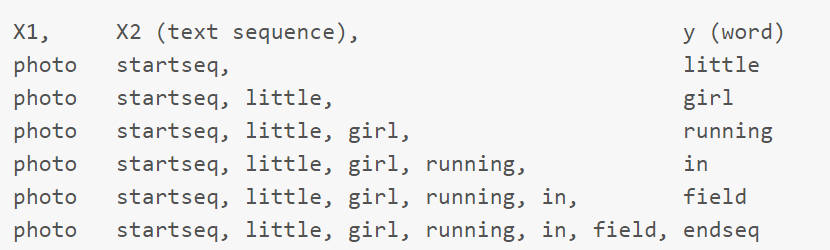
- 4th Step: Model Building
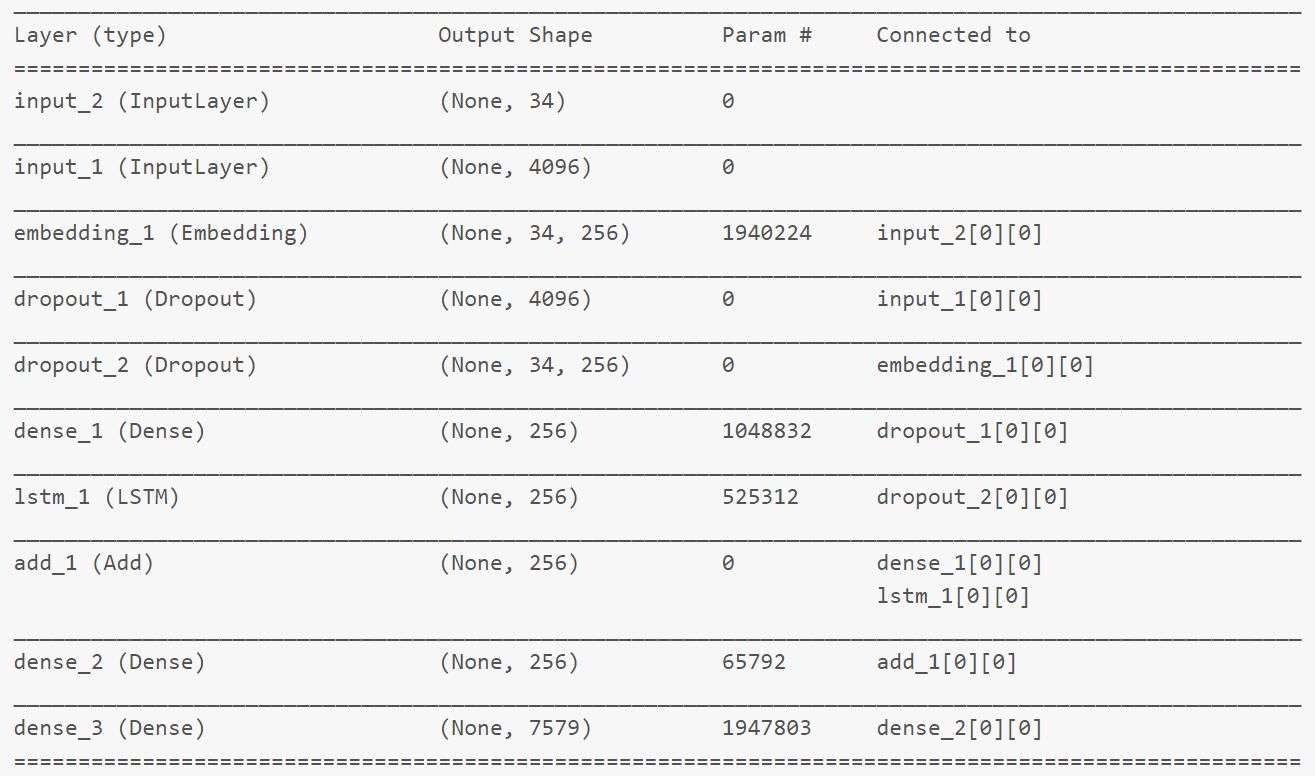

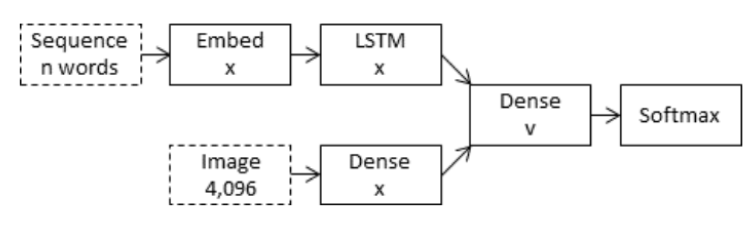

In [101]:
from numpy import array
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, descriptions, photos):
	X1, X2, y = list(), list(), list()
	# walk through each image identifier
	for key, desc_list in descriptions.items():
		# walk through each description for the image
		for desc in desc_list:
			# encode the sequence
			seq = tokenizer.texts_to_sequences([desc])[0]
			# split one sequence into multiple X,y pairs
			for i in range(1, len(seq)):
				# split into input and output pair
				in_seq, out_seq = seq[:i], seq[i]
				# pad input sequence
				in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
				# encode output sequence
				out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
				# store
				X1.append(photos[key][0])
				X2.append(in_seq)
				y.append(out_seq)
	return array(X1), array(X2), array(y)

# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor model
	inputs1 = Input(shape=(1000,))
	fe1 = Dropout(0.2)(inputs1)
	fe2 = Dense(256, activation='selu')(fe1)
	# sequence model
	inputs2 = Input(shape=(max_length,))
	se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	se2 = Dropout(0.2)(se1)
	se3 = LSTM(256)(se2)
	# decoder model
	decoder1 = add([fe2, se3])
	decoder2 = Dense(256, activation='tanh')(decoder1)
	outputs = Dense(vocab_size, activation='softmax')(decoder2)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam')
	# summarize model
	print(model.summary())
	plot_model(model, to_file='model.png', show_shapes=True)
	return model

In [102]:
# train dataset

# load training dataset (6K)
filename = './data/Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('./data/descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features2.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_len = max_length(train_descriptions)
print('Description Length: %d' % max_len)

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 7507
Description Length: 33


In [103]:
# prepare sequences
X1train, X2train, ytrain = create_sequences(tokenizer, max_len, train_descriptions, train_features)

In [104]:
# dev dataset

# load test set
filename = './data/Flickr8k_text/Flickr_8k.devImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('./data/descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features2.pkl', test)
print('Photos: test=%d' % len(test_features))
# prepare sequences
X1test, X2test, ytest = create_sequences(tokenizer, max_len, test_descriptions, test_features)

Dataset: 1000
Descriptions: test=1000
Photos: test=1000


In [105]:
import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
# fit model

# define the model
model = define_model(vocab_size, max_len)
# define checkpoint callback
filepath = './models/resnet/model2-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}-tanh-dropout06.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# fit model
model.fit([X1train, X2train], ytrain, epochs=20, verbose=2, callbacks=[checkpoint], validation_data=([X1test, X2test], ytest))

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_29 (InputLayer)           [(None, 33)]         0                                            
__________________________________________________________________________________________________
input_28 (InputLayer)           [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 33, 256)      1921792     input_29[0][0]                   
__________________________________________________________________________________________________
dropout_21 (Dropout)            (None, 1000)         0           input_28[0][0]                   
____________________________________________________________________________________________

KeyboardInterrupt: 

## Model Assessment

In [83]:
# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

In [84]:
# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

In [106]:
from numpy import argmax
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load training dataset (6K)
filename = './data/Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('./data/descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('features2.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_len = max_length(train_descriptions)
print('Description Length: %d' % max_len)

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 7507
Description Length: 33


In [124]:
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider


# evaluate the skill of the model
def evaluate_model_total(model, test_descriptions, test_features, tokenizer, max_len):
    actual, predicted = {}, {}
    # step over the whole set
    for key, desc_list in test_descriptions.items():
        # generate description
        yhat = generate_desc(model, tokenizer, test_features[key], max_len)
        # store actual and predicted
        actual[key]=desc_list
        predicted[key]=[yhat]
    scorers = [
#         (Bleu(4), ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4"]),
        (Rouge(), "ROUGE_L"),
        (Cider(), "CIDEr")
    ]
    final_scores = {}
    for scorer, method in scorers:
        score, scores = scorer.compute_score(actual, predicted)
        if type(score) == list:
            for m, s in zip(method, score):
                final_scores[m] = s
        else:
            final_scores[method] = score
    return final_scores

In [125]:
# prepare test set

# load test set我
result_dict = {}
model_list = ['model2-ep005-loss3.388-val_loss3.829.h5',
'model2-ep003-loss3.418-val_loss3.594-tanh.h5',
'model2-ep003-loss3.429-val_loss3.617-selu.h5',
'model2-ep003-loss3.338-val_loss3.617-tanh-dropout04.h5',
'model2-ep003-loss3.270-val_loss3.634-tanh-dropout03.h5',
'model2-ep002-loss3.531-val_loss3.649-tanh-dropout02.h5',
'model2-ep002-loss3.458-val_loss3.649-tanh-dropout01.h5',
'model2-ep004-loss3.360-val_loss3.597-tanh-dropout06.h5']

filename = './data/Flickr8k_text/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('./data/descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('features2.pkl', test)
print('Photos: test=%d' % len(test_features))

# load the model
for model_name in model_list:
    print(model_name)
    filename = './models/resnet/' + model_name
    model = load_model(filename)
    # evaluate model
    result_dict[model_name] = evaluate_model_total(model, test_descriptions, test_features, tokenizer, max_len)

Dataset: 1000
Descriptions: test=1000
Photos: test=1000
model2-ep005-loss3.388-val_loss3.829.h5
model2-ep003-loss3.418-val_loss3.594-tanh.h5
model2-ep003-loss3.429-val_loss3.617-selu.h5
model2-ep003-loss3.338-val_loss3.617-tanh-dropout04.h5
model2-ep003-loss3.270-val_loss3.634-tanh-dropout03.h5
model2-ep002-loss3.531-val_loss3.649-tanh-dropout02.h5
model2-ep002-loss3.458-val_loss3.649-tanh-dropout01.h5
model2-ep004-loss3.360-val_loss3.597-tanh-dropout06.h5


In [126]:
result_dict

{'model2-ep005-loss3.388-val_loss3.829.h5': {'ROUGE_L': 0.4416459832675878,
  'CIDEr': 0.2430789912831797},
 'model2-ep003-loss3.418-val_loss3.594-tanh.h5': {'ROUGE_L': 0.45414101529981493,
  'CIDEr': 0.25846509760510855},
 'model2-ep003-loss3.429-val_loss3.617-selu.h5': {'ROUGE_L': 0.44230197208163685,
  'CIDEr': 0.23806177684796073},
 'model2-ep003-loss3.338-val_loss3.617-tanh-dropout04.h5': {'ROUGE_L': 0.44877720568726676,
  'CIDEr': 0.27949039874894094},
 'model2-ep003-loss3.270-val_loss3.634-tanh-dropout03.h5': {'ROUGE_L': 0.4612953969301802,
  'CIDEr': 0.2746746051707021},
 'model2-ep002-loss3.531-val_loss3.649-tanh-dropout02.h5': {'ROUGE_L': 0.4628107909477685,
  'CIDEr': 0.29408639838538214},
 'model2-ep002-loss3.458-val_loss3.649-tanh-dropout01.h5': {'ROUGE_L': 0.45563435158997073,
  'CIDEr': 0.2669195754953765},
 'model2-ep004-loss3.360-val_loss3.597-tanh-dropout06.h5': {'ROUGE_L': 0.44496932747556656,
  'CIDEr': 0.2494474286067558}}

In [127]:
result = pd.read_excel('result.xlsx')

In [128]:
result

extract feature model activate func  dropout  input dim  \
0              resnet50          relu      0.5       1000   
1              resnet50          tanh      0.5       1000   
2              resnet50          selu      0.5       1000   
3              resnet50          tanh      0.4       1000   
4              resnet50          tanh      0.3       1000   
5              resnet50          tanh      0.2       1000   
6              resnet50          tanh      0.1       1000   
7              resnet50          tanh      0.6       1000   

  train loss with max epoch     bleu1     bleu2     bleu3     bleu4     Rouge  \
0                3.8391 (5)  0.492489  0.263569  0.183300  0.084579  0.441646   
1                 3.594 (3)  0.535211  0.291711  0.198762  0.090512  0.454141   
2                 3.617 (3)  0.494754  0.269477  0.190778  0.089865  0.442302   
3                 3.617 (3)  0.516353  0.278214  0.194223  0.091009  0.448777   
4               3.64743 (3)  0.544451  0.301885  0.211698  0.102815  0.461295   
5                 3.531 (3)  0.539877  0.310266  0.218471  0.103903  0.462811   
6                 3.458 (2)  0.527637  0.289514  0.200783  0.096058  0.455634   
7                  3.36 (4)  0.525868  0.278092  0.188372  0.086920  0.444969   

      Cider                                         model name  
0  0.243079            model2-ep005-loss3.388-val_loss3.829.h5  
1  0.258465       model2-ep003-loss3.418-val_loss3.594-tanh.h5  
2  0.238062       model2-ep003-loss3.429-val_loss3.617-selu.h5  
3  0.279490  model2-ep003-loss3.338-val_loss3.617-tanh-drop...  
4  0.274675  model2-ep003-loss3.270-val_loss3.634-tanh-drop...  
5  0.294086  model2-ep002-loss3.531-val_loss3.649-tanh-drop...  
6  0.266920  model2-ep002-loss3.458-val_loss3.649-tanh-drop...  
7  0.249447  model2-ep004-loss3.360-val_loss3.597-tanh-drop...

In [129]:
import matplotlib.pyplot as plt

In [150]:
result_activate_func = result.iloc[0:3]
result_tanh = result[result['activate func'] == 'tanh']

In [152]:
result_tanh.sort_values("dropout",inplace=True)

<ipython-input-152-21a4c2f1f14a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_tanh.sort_values("dropout",inplace=True)


In [167]:
result

extract feature model activate func  dropout  input dim  \
0              resnet50          relu      0.5       1000   
1              resnet50          tanh      0.5       1000   
2              resnet50          selu      0.5       1000   
3              resnet50          tanh      0.4       1000   
4              resnet50          tanh      0.3       1000   
5              resnet50          tanh      0.2       1000   
6              resnet50          tanh      0.1       1000   
7              resnet50          tanh      0.6       1000   

  train loss with max epoch     bleu1     bleu2     bleu3     bleu4     Rouge  \
0                3.8391 (5)  0.492489  0.263569  0.183300  0.084579  0.441646   
1                 3.594 (3)  0.535211  0.291711  0.198762  0.090512  0.454141   
2                 3.617 (3)  0.494754  0.269477  0.190778  0.089865  0.442302   
3                 3.617 (3)  0.516353  0.278214  0.194223  0.091009  0.448777   
4               3.64743 (3)  0.544451  0.301885  0.211698  0.102815  0.461295   
5                 3.531 (3)  0.539877  0.310266  0.218471  0.103903  0.462811   
6                 3.458 (2)  0.527637  0.289514  0.200783  0.096058  0.455634   
7                  3.36 (4)  0.525868  0.278092  0.188372  0.086920  0.444969   

      Cider                                         model name  
0  0.243079            model2-ep005-loss3.388-val_loss3.829.h5  
1  0.258465       model2-ep003-loss3.418-val_loss3.594-tanh.h5  
2  0.238062       model2-ep003-loss3.429-val_loss3.617-selu.h5  
3  0.279490  model2-ep003-loss3.338-val_loss3.617-tanh-drop...  
4  0.274675  model2-ep003-loss3.270-val_loss3.634-tanh-drop...  
5  0.294086  model2-ep002-loss3.531-val_loss3.649-tanh-drop...  
6  0.266920  model2-ep002-loss3.458-val_loss3.649-tanh-drop...  
7  0.249447  model2-ep004-loss3.360-val_loss3.597-tanh-drop...

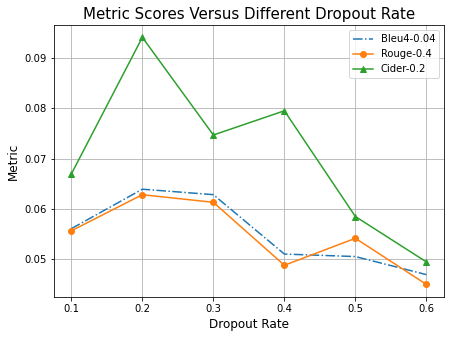

In [168]:

plt.figure(figsize=(7,5))
plt.grid()
plt.title('Metric Scores Versus Different Dropout Rate', fontsize=15)
plt.plot(result_tanh['dropout'], result_tanh['bleu4']-0.04, "-.", label='Bleu4-0.04')
plt.plot(result_tanh['dropout'], result_tanh['Rouge']-0.4, "-o", label='Rouge-0.4')
plt.plot(result_tanh['dropout'], result_tanh['Cider']-0.2, "-^", label='Cider-0.2')
plt.xlabel('Dropout Rate', fontsize=12)
plt.ylabel('Metric', fontsize=12)
plt.legend()
plt.show()

We used pre-trained resnet50 model as our final image features extractor. We first trained a model with pre-inject architecture. The encoder is resnet50 and the decoder is an LSTM model. Activate function decides what information will remain or be deleted to next layer. Therefore, different activate functions performs differently. We first trained models with dropout rate 0.5 and tanh, relu and selu activate functions. We found that tanh performs best (see table x). We then tuned the dropout rate from 0.1 to 0.6. Dropout rate can reduce the possibility of overfitting. In many cases, 0.5 is the best choice. However, in our case, the dataset is very small. High dropout rate cause more information to be lost, resulting in worse text generation. We found that dropout rate 0.2 performs best and with dropout rate gose higher, all the bleu4, rouge and cider tend to be lower. Finally we found that, when activate funcion is tanh and the dropout rate is 0.2, the model performs best. The Bleu4 is 0.103903, Rouge is 0.462811, and Cider is 0.294086.

## Generate new caption

### save tokenizer

In [ ]:
from pickle import dump
# load training dataset (6K)
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer
dump(tokenizer, open('Model Results/2nd Run (ResNet 50)/tokenizer2', 'wb'))

In [ ]:
# extract features from each photo in the directory
def extract_one_image_features(filename):
	# load the model
	model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

In [ ]:
# load the tokenizer
tokenizer = load(open('Model Results/2nd Run (ResNet 50)/tokenizer2', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
filename = './models/resnet/model2-ep005-loss3.388-val_loss3.829.h5'
model = load_model(filename)
# load and prepare the photograph
photo = extract_one_image_features('test.jpg')
# generate description
description = generate_desc(model, tokenizer, photo, max_length)
print(description)

In [115]:
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider


# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
    actual, predicted = {}, {}
    # step over the whole set
    for key, desc_list in descriptions.items():
        # generate description
        yhat = generate_desc(model, tokenizer, photos[key], max_length)
        # store actual and predicted
        actual[key]=desc_list
        predicted[key]=[yhat]
    scorers = [
        (Bleu(4), ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4"]),
        (Rouge(), "ROUGE_L"),
        (Cider(), "CIDEr")
    ]
    final_scores = {}
    for scorer, method in scorers:
        score, scores = scorer.compute_score(actual, predicted)
        if type(score) == list:
            for m, s in zip(method, score):
                final_scores[m] = s
        else:
            final_scores[method] = score
    return final_scores

In [ ]:
evaluate_model()